In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fnmatch import fnmatch
import pandas as pd
import numpy as np
import time


sns.set_style("white")

In [2]:
# accumulate fit random seed in the /src director
pattern = "*.csv"
outfilenames = []
for path, subdirs, files in os.walk('./out/'):
    for name in files:
        if fnmatch(name, pattern):
            outfilenames.append(os.path.join(path, name)) 


dataframes = [pd.read_csv(df) for df in outfilenames]
if len(dataframes) > 0:
    df_concat = pd.concat(dataframes)
    df_concat.to_csv('linear_synthetic_agg_'+str(int(time.time()*1e6))+'.csv')


In [3]:
# df_concat = pd.read_csv("linear_synthetic_agg_1630302542600186.csv")

linres = df_concat
# print(list(linres.columns))

subres_testct =  linres[[
'causalrep_testctaccs_0.1', \
'naive_testct_lintestacc', \
'oracle_testct_lintestacc', \
'spurious_corr']]

subres_testobs =  linres[['causalrep_testobsaccs_0.01', \
'naive_testobs_lintestacc', \
'oracle_testobs_lintestacc', \
'spurious_corr']]

# plot diagonal line
def plot_unity(xdata, ydata, **kwargs):
    mn = min(xdata.min(), ydata.min())
    mx = max(xdata.max(), ydata.max())
    points = np.linspace(mn, mx, 100)
    plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)

In [4]:
# linres = df_concat[(df_concat['neg_corr']==1) & (df_concat['pm_coef']==1)]

In [5]:
linres_1_1 = linres[[
'causalrep_testctaccs_0.0001', \
'naive_testct_lintestacc', \
'oracle_testct_lintestacc']].stack().reset_index().set_index('level_0').rename(columns={'level_1':'method',0:'acc'})

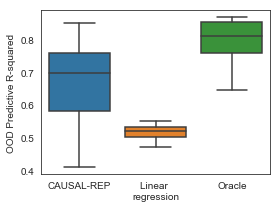

In [6]:
plt.figure(figsize=(4,3))
g = sns.boxplot(x="method", y="acc", data=linres_1_1)
g.set(xticklabels=['CAUSAL-REP', 'Linear \nregression', 'Oracle'])
# g.set(ylim=(-1,1))
g.set(xlabel='')
g.set(ylabel='OOD Predictive R-squared')
plt.tight_layout()
plt.savefig('linear_synthetic_boxplot.pdf')

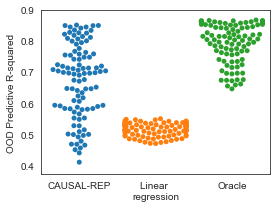

In [7]:
plt.figure(figsize=(4,3))
g = sns.swarmplot(x="method", y="acc", data=linres_1_1)
g.set(xticklabels=['CAUSAL-REP', 'Linear \nregression', 'Oracle'])
g.set(xlabel='')
g.set(ylabel='OOD Predictive R-squared')
plt.tight_layout()
plt.savefig('linear_synthetic_swarmplot.pdf')